In [1]:
import pandas as pd
import os, glob
import numpy as np
from scipy.stats import t
#from google.colab import drive
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re
pd.options.display.float_format = '{:e}'.format
#!pip install rampy
import rampy
from sklearn.metrics import r2_score
from scipy.stats import linregress

from matplotlib import font_manager
font_path = 'Ruda-Regular.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
#from google.colab import drive
#drive.mount('/content/drive')
PALETTE = ['#1b6872', '#df208a', '#efb475', '#aec5fb', '#D5A6E6', '#A4D4B4', '#FFD166', '#FF6F61']

In [2]:
path = "Nova pasta"

In [3]:
# Define relative path to folder containing the text files
files_folder = str(path)

# Create a dataframe list by using a list WITHprehension
files = [pd.read_csv(file, delimiter=',', skiprows=5, encoding = 'utf16') for file in glob.glob(os.path.join(files_folder ,"*.csv"))]

# Get filenames
electrode = [os.path.basename(filename)[:].rstrip('csv') for filename in glob.glob(os.path.join(files_folder ,"*.csv"))]

print(electrode)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files, axis=1)
files_df = files_df[['V','µA']]
files_df = files_df.T.drop_duplicates().T

sensor = electrode
d ={'µA':sensor}
files_df = files_df.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)

files_df.head()

['1-10mgL-SWV-5mM-FF-1.', '1-10mgL-SWV-5mM-FF-2.', '1-10mgL-SWV-5mM-FF.', '1-branco-SWV-5mM-FF-1.', '1-branco-SWV-5mM-FF-2.', '1-branco-SWV-5mM-FF.', '1-limpo-SWV-5mM-FF-1.', '1-limpo-SWV-5mM-FF-2.', '1-limpo-SWV-5mM-FF.', '10-CBM-SWV-5mM-FF-1.', '10-CBM-SWV-5mM-FF-2.', '10-CBM-SWV-5mM-FF.', '10-D0-SWV-5mM-FF-1.', '10-D0-SWV-5mM-FF-2.', '10-D0-SWV-5mM-FF.', '10-D1-SWV-5mM-FF-1.', '10-D1-SWV-5mM-FF-2.', '10-D1-SWV-5mM-FF.', '10-D2-SWV-5mM-FF-1.', '10-D2-SWV-5mM-FF-2.', '10-D2-SWV-5mM-FF.', '10-D3-SWV-5mM-FF-1.', '10-D3-SWV-5mM-FF-2.', '10-D3-SWV-5mM-FF.', '10-D4-SWV-5mM-FF-1.', '10-D4-SWV-5mM-FF-2.', '10-D4-SWV-5mM-FF.', '10-D5-SWV-5mM-FF-1.', '10-D5-SWV-5mM-FF-2.', '10-D5-SWV-5mM-FF.', '10-limpo-SWV-5mM-FF-1.', '10-limpo-SWV-5mM-FF-2.', '10-limpo-SWV-5mM-FF.', '10-superblock-SWV-5mM-FF-1.', '10-superblock-SWV-5mM-FF-2.', '10-superblock-SWV-5mM-FF.', '11-CBM-SWV-5mM-FF-1.', '11-CBM-SWV-5mM-FF-2.', '11-CBM-SWV-5mM-FF.', '11-D0-SWV-5mM-FF-1.', '11-D0-SWV-5mM-FF-2.', '11-D0-SWV-5mM-FF.', '

,V,1-10mgL-SWV-5mM-FF-1.,1-10mgL-SWV-5mM-FF-2.,1-10mgL-SWV-5mM-FF.,1-branco-SWV-5mM-FF-1.,1-branco-SWV-5mM-FF-2.,1-branco-SWV-5mM-FF.,1-limpo-SWV-5mM-FF-1.,1-limpo-SWV-5mM-FF-2.,1-limpo-SWV-5mM-FF.,...,9-D5-SWV-5mM-FF-1.,9-D5-SWV-5mM-FF-2.,9-D5-SWV-5mM-FF-3.,9-D5-SWV-5mM-FF.,9-limpo-SWV-5mM-FF-1.,9-limpo-SWV-5mM-FF-2.,9-limpo-SWV-5mM-FF.,9-superblock-SWV-5mM-FF-1.,9-superblock-SWV-5mM-FF-2.,9-superblock-SWV-5mM-FF.
0,-0.0964460372924805,1.786952e+01,1.779799e+01,1.210933e+01,1.519923e+01,1.521831e+01,1.004939e+01,1.426463e+01,1.443152e+01,7.627058e+00,...,1.098399e+01,1.835113e+01,1.960526e+01,1.168017e+01,1.230006e+01,1.235251e+01,8.113432e+00,1.526122e+01,1.534705e+01,1.058345e+01
1,-0.0929298400878906,1.198058e+01,1.189952e+01,8.251715e+00,9.586859e+00,9.572554e+00,6.434965e+00,8.857298e+00,8.938360e+00,4.818439e+00,...,6.983328e+00,1.148467e+01,1.241927e+01,7.402945e+00,7.598448e+00,7.588911e+00,5.066395e+00,1.011138e+01,1.016860e+01,7.083464e+00
2,-0.0894927978515625,9.210157e+00,9.129095e+00,6.444502e+00,7.011938e+00,6.978559e+00,4.780293e+00,6.392050e+00,6.430197e+00,3.550053e+00,...,5.171299e+00,8.361387e+00,9.081411e+00,5.414486e+00,5.438328e+00,5.424023e+00,3.693104e+00,7.684278e+00,7.717657e+00,5.452633e+00
3,-0.0859766006469727,7.627058e+00,7.545996e+00,5.428791e+00,5.567074e+00,5.533695e+00,3.864765e+00,5.023479e+00,5.042553e+00,2.849102e+00,...,4.169941e+00,6.635237e+00,7.202673e+00,4.327297e+00,4.241467e+00,4.217625e+00,2.925396e+00,6.296682e+00,6.320524e+00,4.518032e+00
4,-0.0824613571166992,6.625700e+00,6.539869e+00,4.785061e+00,4.675388e+00,4.642010e+00,3.297329e+00,4.184246e+00,4.193783e+00,2.439022e+00,...,3.545284e+00,5.552769e+00,6.024837e+00,3.654957e+00,3.516674e+00,3.483295e+00,2.467632e+00,5.409718e+00,5.428791e+00,3.921986e+00


([<matplotlib.axis.XTick at 0x1c1d5409420>,
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4')])

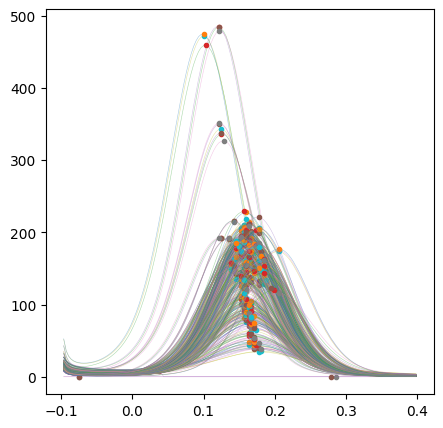

In [4]:
plt.rcParams["figure.figsize"] = (5,5)

files_df['V'] = pd.to_numeric(files_df['V'], downcast='float',  errors='coerce')

x = files_df['V'] # First column data
df = files_df.loc[(files_df['V']<=0.3) & (files_df['V']>=-0.1)].reset_index(drop=True) #select X range
col1 = df['V'] # First column data

peak_current = []
v_peak_current = []
eletrodo = []

a = 0

for column in df.columns[1:]:
        y = files_df[column]
        col2 = df[column] # Second column data

        #Find peaks
        peak_idx, _ = find_peaks(col2, prominence=0.000000001, height = 0.00 , distance = 100)  # Find peaks

        #Potential applied and array informations
        v_peak_current.append(df.at[peak_idx.max(),'V'])
        peak_current.append(col2[peak_idx.max()])
        condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)
        #print(condicao)

        eletrodo.append( condicao[0] + '-' + condicao[1])

        #Plot data
        plt.plot(x,y, lw=0.4, alpha=0.4 )

        #Plot peaks and valleys
        plt.plot(col1[peak_idx],col2[peak_idx], marker="o", ls="", ms=3)

        #Read data
        a+=1

plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4])
#print(a)
#print(eletrodo[0])

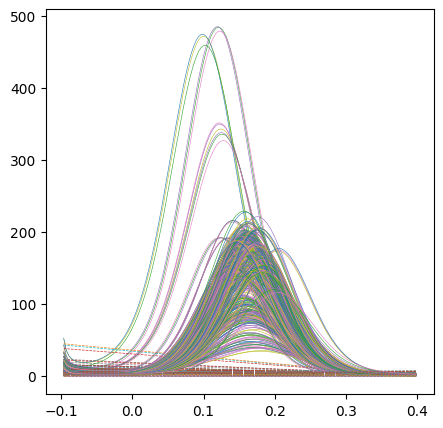

In [5]:
plt.rcParams["figure.figsize"] = (5,5)

baseline_data = {}

bl_1 = []

# need to define some fitting regions for the spline
roi = np.array([[-0.055,-0.0],[0.33,0.37]])

x = files_df['V'].to_numpy(dtype=float)
x = x[~np.isnan(x)]

baseline_data['V'] = x

for column in files_df.columns[1:]:
    y = files_df[column].to_numpy(dtype=float)
    y = y[~np.isnan(y)]
    # calculating the baselines
    ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=1)
    bl_1.extend(base_poly[peak_idx[0]])
    #data - baseline
    subtracted = list()
    for item1, item2 in zip(y, base_poly):
        item = item1 - item2
        subtracted.extend(item)
    baseline_data[column] = subtracted
    #plot
    plt.plot(x, y, lw = 0.4)
    plt.plot(x, base_poly,linestyle= 'dashed', lw = 0.5)

In [6]:
results = pd.DataFrame()

results['eletrodo'] = eletrodo
results['peak_current'] = peak_current
results['v_peak_current'] = v_peak_current
results['baseline_current'] = bl_1

results_baseline = pd.DataFrame()

results_baseline['eletrodo'] = eletrodo
results_baseline['peak_current'] = results.apply(lambda row : row['peak_current'] - row['baseline_current'], axis=1)
results_baseline['v_peak_current'] = v_peak_current

results_baseline.head()

,eletrodo,peak_current,v_peak_current
0,1-10mgL,1.666358e+02,1.526957e-01
1,1-10mgL,1.685731e+02,1.526957e-01
2,1-10mgL,1.614255e+02,1.526957e-01
3,1-branco,2.024877e+02,1.526957e-01
4,1-branco,2.033163e+02,1.526957e-01


In [7]:
#results_baseline.to_excel('08 29 24 limpos L7 lote 1.xlsx')

In [8]:
# results_mean_1 será para os dados de antes de a gente ir embora para consulta
# e results_mean_2 para os que a Juliana fez sozinha depois

results_mean = results_baseline.groupby(['eletrodo'], as_index=False)[['peak_current','v_peak_current']].agg({'peak_current':['mean','std'],'v_peak_current':['mean','std']})

results_mean

eletrodo peak_current              v_peak_current             
                          mean          std           mean          std
0         1-10mgL 1.655448e+02 3.696564e+00   1.526957e-01 0.000000e+00
1        1-branco 2.018915e+02 1.798645e+00   1.526957e-01 0.000000e+00
2         1-limpo 2.131517e+02 1.203779e+00   1.421490e-01 0.000000e+00
3          10-CBM 1.792049e+02 6.703713e-01   1.702738e-01 0.000000e+00
4           10-D0 1.596719e+02 2.670368e+00   1.667585e-01 0.000000e+00
..            ...          ...          ...            ...          ...
159          9-D3 2.033716e+02 1.117292e+00   1.773052e-01 0.000000e+00
160          9-D4 2.084373e+02 1.578098e+00   1.632433e-01 0.000000e+00
161          9-D5 2.214513e+02 5.063814e+00   1.632428e-01 9.520263e-03
162       9-limpo 1.854709e+02 1.248259e+00   1.456642e-01 0.000000e+00
163  9-superblock 1.144888e+02 3.655661e+00   1.994931e-01 5.370560e-03

[164 rows x 5 columns]

In [9]:
print(list(results_mean['eletrodo']))

['1-10mgL', '1-branco', '1-limpo', '10-CBM', '10-D0', '10-D1', '10-D2', '10-D3', '10-D4', '10-D5', '10-limpo', '10-superblock', '11-CBM', '11-D0', '11-D1', '11-D2', '11-D3', '11-D4', '11-D5', '11-limpo', '11-superblock', '12-CBM', '12-D0', '12-D1', '12-D2', '12-D3', '12-D4', '12-D5', '12-limpo', '12-superblock', '13-limpo', '14-limpo', '15-limpo', '16-limpo', '17-D1', '17-D2', '17-D3', '17-D4', '17-D5', '17-agua', '17-limpo', '18-D1', '18-D2', '18-D3', '18-D4', '18-D5', '18-agua', '18-limpo', '19-D1', '19-D2', '19-D3', '19-D4', '19-D5', '19-agua', '19-limpo', '2-10mgL', '2-branco', '2-limpo', '20-D1', '20-D2', '20-D3', '20-D4', '20-D5', '20-agua', '20-limpo', '21-D0', '21-D1', '21-D2', '21-D3', '21-D4', '21-D5', '21-branco', '21-limpo', '22-D0', '22-D1', '22-D2', '22-D3', '22-D4', '22-D5', '22-branco', '22-limpo', '23-D0', '23-D1', '23-D2', '23-D3', '23-D4', '23-D5', '23-branco', '23-limpo', '24-D0', '24-D1', '24-D2', '24-D3', '24-D4', '24-D5', '24-branco', '24-limpo', '25-D1', '25-lim

In [10]:
CONCENTRATIONS = [0.01, 0.1, 1, 10, 100]

# Drop casting WITHOUT CBM

## BACBM

['9-D1', '9-D2', '9-D3', '9-D4', '9-D5']
['10-D1', '10-D2', '10-D3', '10-D4', '10-D5']
['11-D1', '11-D2', '11-D3', '11-D4', '11-D5']
['12-D1', '12-D2', '12-D3', '12-D4', '12-D5']
R² of the linear regression: 0.8250


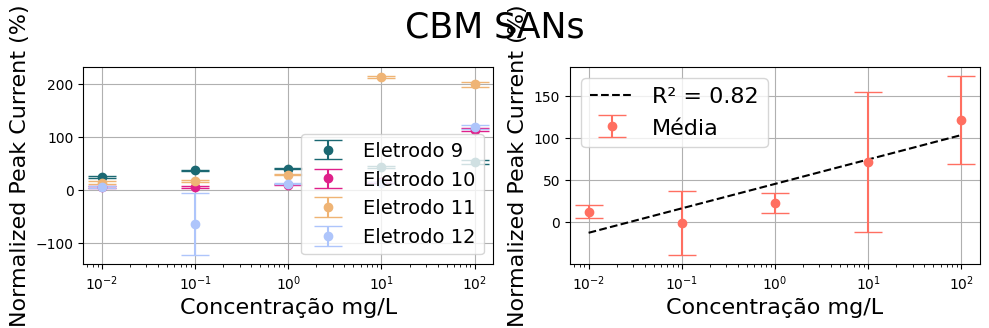

In [11]:
colors = PALETTE
ELEC = []
LIMPOS = []

# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(9, 13):
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(10, 3.3), sharey = False)
ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the peak current for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the peak current
        normalized_mean = 100 * (I_mean - BRANCO) / BRANCO
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Eletrodo {c+9}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color=colors[-1], capsize=10, label='Média')
ax1.set_xscale('log')
ax1.set_xlabel('Concentração mg/L', fontsize=16)
ax1.set_ylabel('Normalized Peak Current (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid()

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='0', label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
ax.set_xlabel('Concentração mg/L', fontsize=16)
ax.set_ylabel('Normalized Peak Current (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
ax.grid()
ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)

fig.suptitle('CBM SANs', fontsize=25)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('CBM_SANS.png', dpi=200, transparent = True)
#

# Print R-squared value
print(f"R² of the linear regression: {r_value**2:.4f}")

['17-D1', '17-D2', '17-D3', '17-D4', '17-D5']
['18-D1', '18-D2', '18-D3', '18-D4', '18-D5']
['19-D1', '19-D2', '19-D3', '19-D4', '19-D5']
['20-D1', '20-D2', '20-D3', '20-D4', '20-D5']
BLANK:

Standard Deviation: 12.401191630723819

R² of the linear regression: 0.7647

Sensitivity: 6.4624



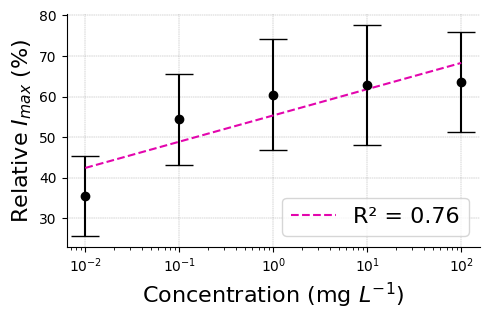

In [12]:
colors = PALETTE
ELEC = []
LIMPOS = []

# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(17, 21):
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-limpo']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.3), sharey = False)
ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+17}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color='0', capsize=10)#, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='#e305ad', label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)


#fig.suptitle('Drop Casting WITHOUT CBM', fontsize=25)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('figures/dropccast_WITHOUT_CBM.png', dpi=200, transparent = True)
#

print('BLANK:')
print()
print(f"Standard Deviation: {np.average(avg_normalized_stds)}")
print()
print(f"R² of the linear regression: {r_value**2:.4f}")
print()
print(f"Sensitivity: {slope:.4f}"); 
print() 

# Dropcasting WITH CBM

['21-D1', '21-D2', '21-D3', '21-D4', '21-D5']
['22-D1', '22-D2', '22-D3', '22-D4', '22-D5']
['23-D1', '23-D2', '23-D3', '23-D4', '23-D5']
['24-D1', '24-D2', '24-D3', '24-D4', '24-D5']
R² of the linear regression: 0.9389
Sensitivity: 5.0860


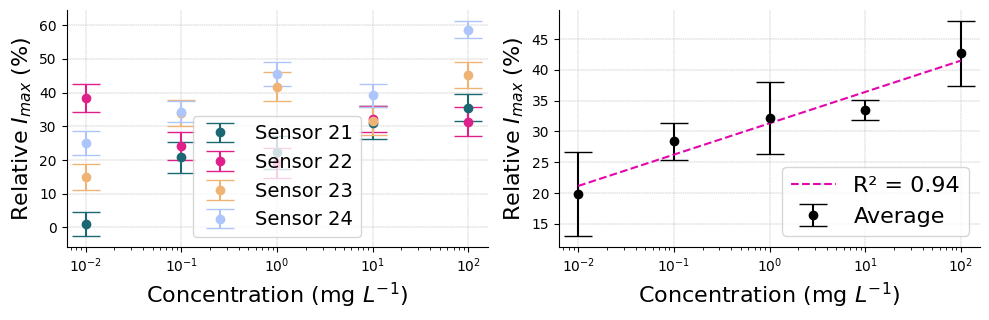

In [13]:
ELEC = []
LIMPOS = []

# Create electrodes and limpos lists for electrodes 21 to 24
for u in range(21, 25):
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0'] 
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(10, 3.3), sharey = False)
fig.subplots_adjust(wspace=0.35)

ax.set_xscale('log')

c = 0
all_normalized_means = []  # Store all normalized means for averaging later
all_normalized_stds = []

# Loop over each electrode set (21 to 24)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)

    # Plot bars with error bars for individual electrodes on ax
    ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, color=colors[c], capsize=10, fmt='o', label=f'Sensor {c+21}')
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c = c + 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)/2

# Plot the average on ax1
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color='0', capsize=10, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 21 to 24', fontsize=18)

# Set x-ticks and x-labels for the first plot
ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting CBM', fontsize=18)
# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='#e305ad', label=f'R² = {r_value**2:.2f}', linestyle = '--')
ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)

print(f"R² of the linear regression: {r_value**2:.4f}"); print(f"Sensitivity: {slope:.4f}"); 
# Adjust layout and save the plot
#fig.suptitle('Drop Casting WITH CBM', fontsize = 25)
plt.tight_layout()

plt.savefig('figures/dropccast_WITH_CBM.png', dpi=200, transparent = True)
#

['21-D1', '21-D2', '21-D3', '21-D4', '21-D5']
['22-D1', '22-D2', '22-D3', '22-D4', '22-D5']
['23-D1', '23-D2', '23-D3', '23-D4', '23-D5']
['24-D1', '24-D2', '24-D3', '24-D4', '24-D5']
Dropcasting CBM:

Standard Deviation: 10.883750541458278

R² of the linear regression: 0.9415

Sensitivity: 4.2392



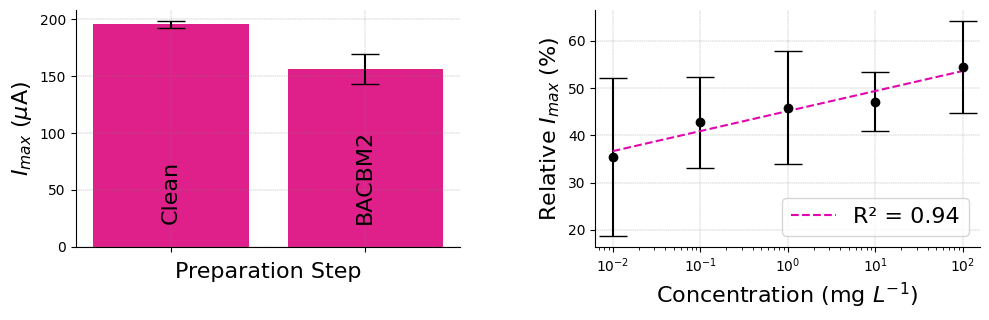

In [14]:
ELEC = []
LIMPOS = []
elecns = [9,10,12]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(21,25):
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(10, 3.3), sharey = False)
#ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color='0', capsize=10)#, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='#e305ad', label=f'R² = {r_value**2:.2f}', linestyle = '--')

print('Dropcasting CBM:')
print()
print(f"Standard Deviation: {np.average(avg_normalized_stds)}")

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)








ELEC = []
LIMPOS = []
etapas = ['limpo', 'branco']
steps = [1,2]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(21,25):
    electrodes = [f'{u}-{i}' for i in etapas]
    #print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
#        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = I_mean
        normalized_std = I_std

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(steps, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

labels = ['Clean', 'BACBM2']
# Plot the average on ax1 (dots with error bars, no connecting lines)
bars = ax.bar(steps, avg_normalized_means, yerr=avg_normalized_stds, color=PALETTE[1], capsize=10)
ax.set_xlabel('Preparation Step', fontsize=16)
ax.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
#ax.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks([1,2])
# Rotate x-tick labels by 45 degrees
ax.set_xticklabels([], fontsize=12, rotation=45)

for bar, label in zip(bars, labels):
    ax.text(bar.get_x() + bar.get_width() / 2, 20, label, ha='center', va='bottom', fontsize=16, rotation=90)

#

#
# Adjust layout and save the plot
plt.tight_layout()
fig.subplots_adjust(wspace=0.35)

plt.savefig('figures/dropccast_WITH_CBM.png', dpi=200, transparent = True)
#









# Print R-squared value

print()
print(f"R² of the linear regression: {r_value**2:.4f}")
print()
print(f"Sensitivity: {slope:.4f}"); 
print()

# SAM

## BACBM

['9-D1', '9-D2', '9-D3', '9-D4', '9-D5']
['10-D1', '10-D2', '10-D3', '10-D4', '10-D5']
['12-D1', '12-D2', '12-D3', '12-D4', '12-D5']
R² of the linear regression: 0.5407
Sensitivity: 15.5286


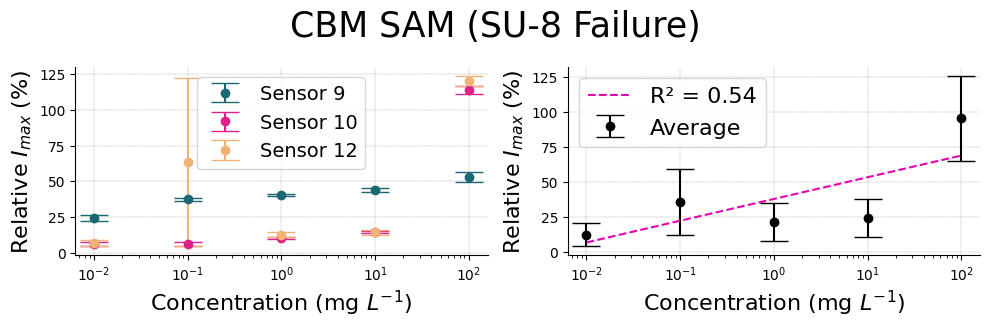

In [15]:
ELEC = []
LIMPOS = []
elecns = [9,10,12]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in elecns:
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(10, 3.3), sharey = False)
ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
ie = 0
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {elecns[ie]}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1
    ie+=1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color='0', capsize=10, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='#e305ad', label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)

fig.suptitle('CBM SAM (SU-8 Failure)', fontsize=25)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('figures/CBM_SAM.png', dpi=200, transparent = True)
#

# Print R-squared value
print(f"R² of the linear regression: {r_value**2:.4f}"); print(f"Sensitivity: {slope:.4f}"); 

['9-D1', '9-D2', '9-D3', '9-D4', '9-D5']
['10-D1', '10-D2', '10-D3', '10-D4', '10-D5']
['12-D1', '12-D2', '12-D3', '12-D4', '12-D5']
['9-limpo', '9-CBM', '9-superblock']
['10-limpo', '10-CBM', '10-superblock']
['12-limpo', '12-CBM', '12-superblock']
R² of the linear regression: 0.5407
Sensitivity: 15.5286


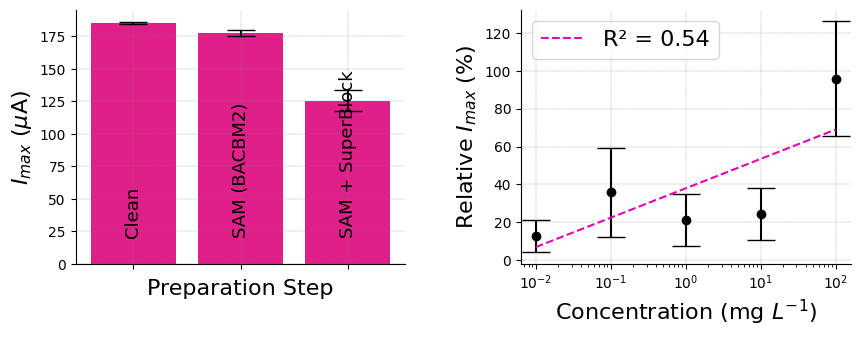

In [16]:
ELEC = []
LIMPOS = []
elecns = [9,10,12]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in elecns:
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(10, 3.3), sharey = False)
fig.subplots_adjust(wspace=0.35)
#ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color='0', capsize=10)#, label='Average')
ax1.set_xscale('log')
ax1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='#e305ad', label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)








ELEC = []
LIMPOS = []
etapas = ['limpo', 'CBM', 'superblock']
steps = [1,2,3]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in elecns:
    electrodes = [f'{u}-{i}' for i in etapas]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
#        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = I_mean
        normalized_std = I_std

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(steps, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

labels = ['Clean', 'SAM (BACBM2)', 'SAM + SuperBlock']
# Plot the average on ax1 (dots with error bars, no connecting lines)
bars = ax.bar(steps, avg_normalized_means, yerr=avg_normalized_stds, color=PALETTE[1], capsize=10)
ax.set_xlabel('Preparation Step', fontsize=16)
ax.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
#ax.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks([1,2,3])
# Rotate x-tick labels by 45 degrees
ax.set_xticklabels([], fontsize=12, rotation=45)

for bar, label in zip(bars, labels):
    ax.text(bar.get_x() + bar.get_width() / 2, 20, label, ha='center', va='bottom', fontsize=13, rotation=90)

# Adjust layout and save the plot
#plt.tight_layout()
plt.savefig('figures/CBM_SAM.png', dpi=200, transparent = True)
#









# Print R-squared value
print(f"R² of the linear regression: {r_value**2:.4f}"); print(f"Sensitivity: {slope:.4f}"); 

## CISTEAMINA + BACBM

['6-D1', '6-D2', '6-D3', '6-D4', '6-D5']
['7-D1', '7-D2', '7-D3', '7-D4', '7-D5']
['8-D1', '8-D2', '8-D3', '8-D4', '8-D5']
avg_normalized_means:
[ 4.83424063  8.9639769  11.85647072 15.91889593 20.74468563]

avg_normalized_stds:
[0.67207522 0.22553212 0.46325198 1.14215929 1.9373301 ]
SAM + CBM:

Standard Deviation: 0.8880697422940986

R² of the linear regression: 0.9935

Sensitivity: 3.8776



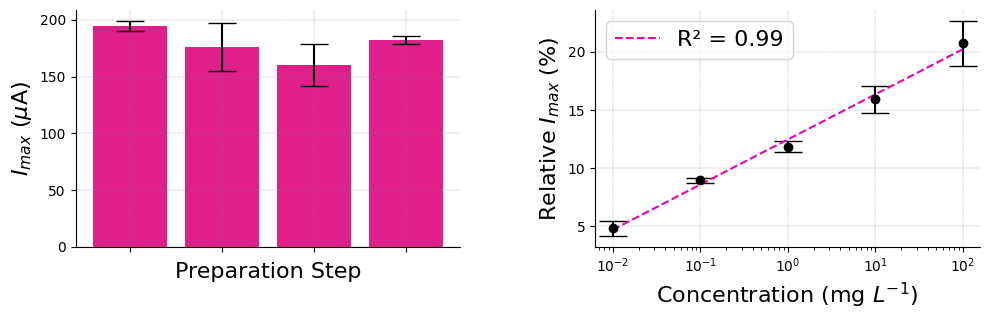

In [17]:
ELEC = []
LIMPOS = []

# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(6, 9):
    electrodes = [f'{u}-D{i}' for i in range(1, 6)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(10, 3.3), sharey = False)
#ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

# Plot the average on ax1 (dots with error bars, no connecting lines)
ax1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color='0', capsize=10)#, label='Average')
print('avg_normalized_means:')
print(avg_normalized_means)
print()
print('avg_normalized_stds:')
print(avg_normalized_stds)

ax1.set_xscale('log')
ax1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax1.plot(CONCENTRATIONS, regression_line, color='#e305ad', label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Print R-squared value
print('SAM + CBM:')
print()
print(f"Standard Deviation: {np.average(avg_normalized_stds)}")
# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax1.legend(fontsize = 16)
ax.spines[['right', 'top']].set_visible(False)
ax1.spines[['right', 'top']].set_visible(False)








ELEC = []
LIMPOS = []
etapas = ['limpo', 'cisteamina', 'cisteaminaCBM', 'superblock']
steps = [1,2,3,4]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(6, 9):
    electrodes = [f'{u}-{i}' for i in etapas]
    #print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-D0']
    LIMPOS.append(limpos)

# Data storage for the bar plot

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
#        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = I_mean
        normalized_std = I_std

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(steps, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

labels = ['Clean', 'SAM', 'SAM + BACBM2' , 'SAM + BACBM2 + SuperBlock']
# Plot the average on ax1 (dots with error bars, no connecting lines)
bars = ax.bar(steps, avg_normalized_means, yerr=avg_normalized_stds, color=PALETTE[1], capsize=10)
ax.set_xlabel('Preparation Step', fontsize=16)
ax.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
#ax.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks([1,2,3,4])
# Rotate x-tick labels by 45 degrees
ax.set_xticklabels([], fontsize=12, rotation=45)

#for bar, label in zip(bars, labels):
    #ax.text(bar.get_x() + bar.get_width() / 2, 20, label, ha='center', va='bottom', fontsize=13, rotation=90)


# Adjust layout and save the plot
plt.tight_layout()
fig.subplots_adjust(wspace=0.35)

plt.savefig('figures/CISTEAMINA_CBM_SAM.png', dpi=200, transparent = True)
#









# Print R-squared value
#print('SAM + CBM:')
#print()
#print(f"Standard Deviation: {np.average(avg_normalized_stds)}")
print()
print(f"R² of the linear regression: {r_value**2:.4f}")
print()
print(f"Sensitivity: {slope:.4f}"); 
print()

# PLOTS SVW

## Dados anteriores:

In [18]:
path = "Medidas SVW"

In [19]:
# Define relative path to folder containing the text files
files_folder = str(path)

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=',', skiprows=5, encoding = 'utf16') for file in glob.glob(os.path.join(files_folder ,"*.csv"))]

# Get filenames
electrode = [os.path.basename(filename)[:].rstrip('csv') for filename in glob.glob(os.path.join(files_folder ,"*.csv"))]

print(electrode)

# Concatenate the list of DataFrames into one
files_df2 = pd.concat(files, axis=1)
files_df2 = files_df2[['V','µA']]
files_df2 = files_df2.T.drop_duplicates().T

sensor = electrode
d ={'µA':sensor}
files_df2 = files_df2.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)

['1-branco-SWV-5mM-FF-1.', '1-branco-SWV-5mM-FF-2.', '1-branco-SWV-5mM-FF.', '1-CBM-SWV-5mM-FF-1.', '1-CBM-SWV-5mM-FF-2.', '1-CBM-SWV-5mM-FF.', '1-cisteina-SWV-5mM-FF-1.', '1-cisteina-SWV-5mM-FF-2.', '1-cisteina-SWV-5mM-FF.', '1-D6-SWV-5mM-FF-1.', '1-D6-SWV-5mM-FF-2.', '1-D6-SWV-5mM-FF.', '1-D7-SWV-5mM-FF-1.', '1-D7-SWV-5mM-FF-2.', '1-D7-SWV-5mM-FF.', '1-limpo-SWV-5mM-FF-1.', '1-limpo-SWV-5mM-FF-2.', '1-limpo-SWV-5mM-FF.', '1-PBS-SWV-5mM-FF-1.', '1-PBS-SWV-5mM-FF-2.', '1-PBS-SWV-5mM-FF.', '10-branco-SWV-5mM-FF-1.', '10-branco-SWV-5mM-FF-2.', '10-branco-SWV-5mM-FF.', '10-CBM-SWV-5mM-FF-1.', '10-CBM-SWV-5mM-FF-2.', '10-CBM-SWV-5mM-FF.', '10-D6-SWV-5mM-FF-1.', '10-D6-SWV-5mM-FF-2.', '10-D6-SWV-5mM-FF.', '10-D7-SWV-5mM-FF-1.', '10-D7-SWV-5mM-FF-2.', '10-D7-SWV-5mM-FF.', '10-GO-SWV-5mM-FF-1.', '10-GO-SWV-5mM-FF-2.', '10-GO-SWV-5mM-FF.', '10-limpo-SWV-5mM-FF-1.', '10-limpo-SWV-5mM-FF-2.', '10-limpo-SWV-5mM-FF.', '10-PBS-SWV-5mM-FF-1.', '10-PBS-SWV-5mM-FF-2.', '10-PBS-SWV-5mM-FF.', '11-branco

In [20]:
files_df2['12-limpo-SWV-5mM-FF.'] = files_df2['16-limpo-SWV-5mM-FF.']
files_df2['12-limpo-SWV-5mM-FF-1.'] = files_df2['16-limpo-SWV-5mM-FF-1.']
files_df2['12-limpo-SWV-5mM-FF-2.'] = files_df2['16-limpo-SWV-5mM-FF-2.']

# OBSERVAÇÃO:
### Os do grafeno foram na verdade do 9 ao 12 do dia 18 e 19. Mas como pegamos outros sensores e usamos a mesma numeração eu mudei aqui de 25 a 28

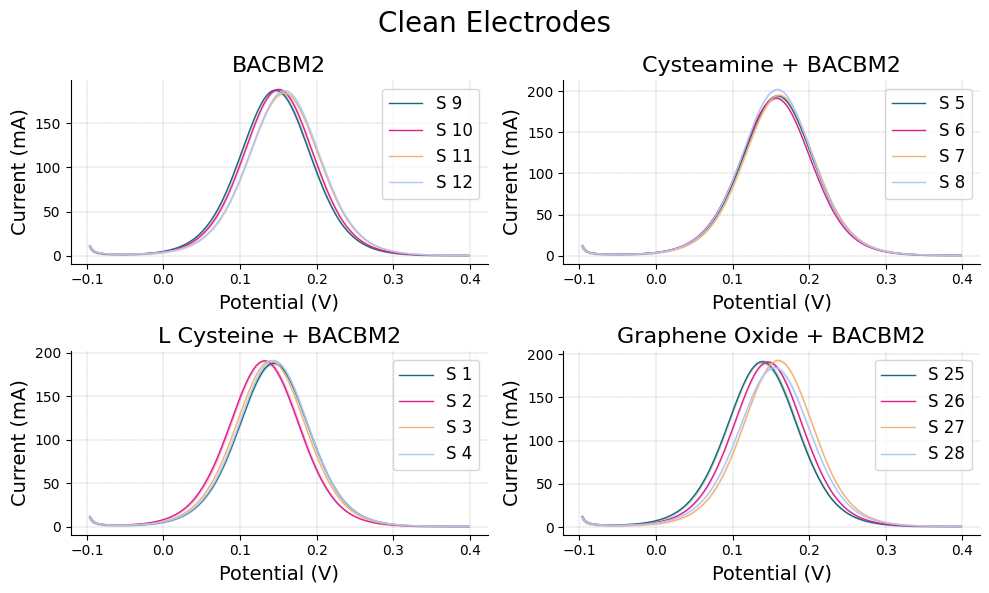

In [21]:
#fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ETAPAS = ['limpo']
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 6))
ax1.set_title("BACBM2",fontsize = 16)
ax2.set_title("Cysteamine + BACBM2",fontsize = 16)
ax3.set_title("L Cysteine + BACBM2",fontsize = 16)
ax4.set_title("Graphene Oxide + BACBM2",fontsize = 16)


# CISTEAMINA:
c = 0
for u in range(5, 9):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-{ETAPAS[0]}-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax2.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax2.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)

    c+=1

# SÓ CBM:
c = 0

for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-{ETAPAS[0]}-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax1.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax1.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

# L cisteína:
c = 0
for u in range(1, 5):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-{ETAPAS[0]}-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax3.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax3.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

c = 0
for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-{ETAPAS[0]}-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-{ETAPAS[0]}-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax4.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u+16}')
    ax4.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1
    
    
    
for ax in [ax1,ax2,ax3, ax4]:
#    ax.set_xticks([-0.1, 0, 0.1, 0.2,0.3, 0.4])
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
    ax.set_xlabel('Potential (V)', fontsize=14)
    ax.set_ylabel('Current (mA)', fontsize=14)
    ax.legend(fontsize=12)#, loc=1, bbox_to_anchor=(1.4, 1), framealpha=0.0)
    ax.spines[['right', 'top']].set_visible(False)
#ax1.set_xlim(0.14, 0.2)
#ax1.set_ylim(170, 195)
fig.suptitle("Clean Electrodes", fontsize = 20)
plt.tight_layout()
plt.savefig('figures/LIMPOS_SWV.png',dpi = 200)

# INCUBACAO

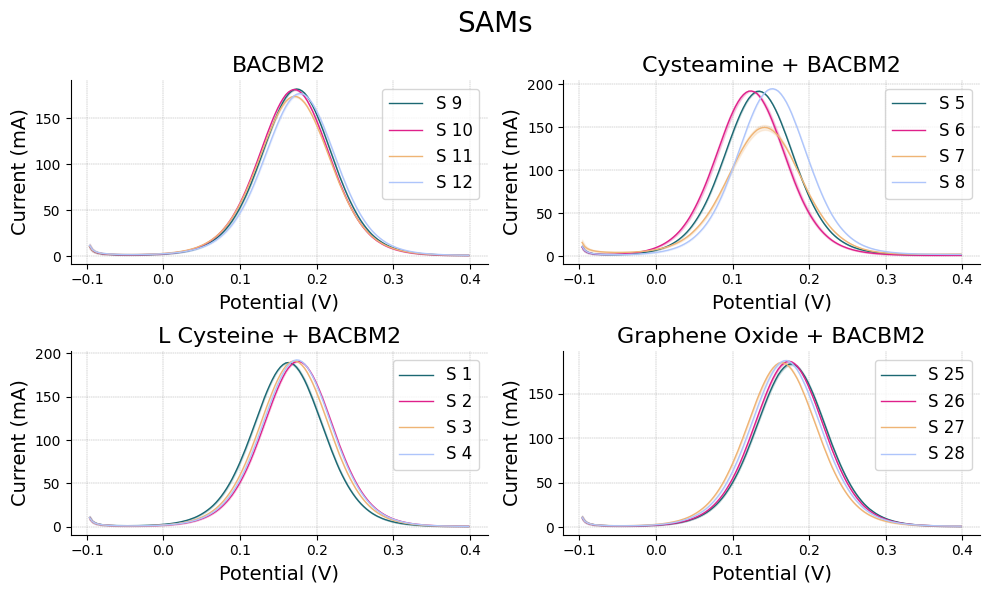

In [22]:
#fig, ax = plt.subplots(1, 1, figsize=(5, 3))
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 6))
ax1.set_title("BACBM2",fontsize = 16)
ax2.set_title("Cysteamine + BACBM2",fontsize = 16)
ax3.set_title("L Cysteine + BACBM2",fontsize = 16)
ax4.set_title("Graphene Oxide + BACBM2",fontsize = 16)


# CISTEAMINA:
c = 0
for u in range(5, 9):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-cisteamina-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-cisteamina-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-cisteamina-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax2.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax2.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)

    c+=1

# SÓ CBM:
c = 0

for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-CBM-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-CBM-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-CBM-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax1.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax1.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

# L cisteína:
c = 0
for u in range(1, 5):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-cisteina-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-cisteina-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-cisteina-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax3.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax3.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

c = 0
for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-GO-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-GO-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-GO-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax4.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u+16}')
    ax4.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1
    
    
    
for ax in [ax1,ax2,ax3, ax4]:
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
    ax.set_xlabel('Potential (V)', fontsize=14)
    ax.set_ylabel('Current (mA)', fontsize=14)
    ax.legend(fontsize=12)#, loc=1, bbox_to_anchor=(1.4, 1), framealpha=0.0)
    ax.spines[['right', 'top']].set_visible(False)
fig.suptitle("SAMs", fontsize = 20)
plt.tight_layout()
plt.savefig('figures/SAM_SWV.png',dpi = 200)

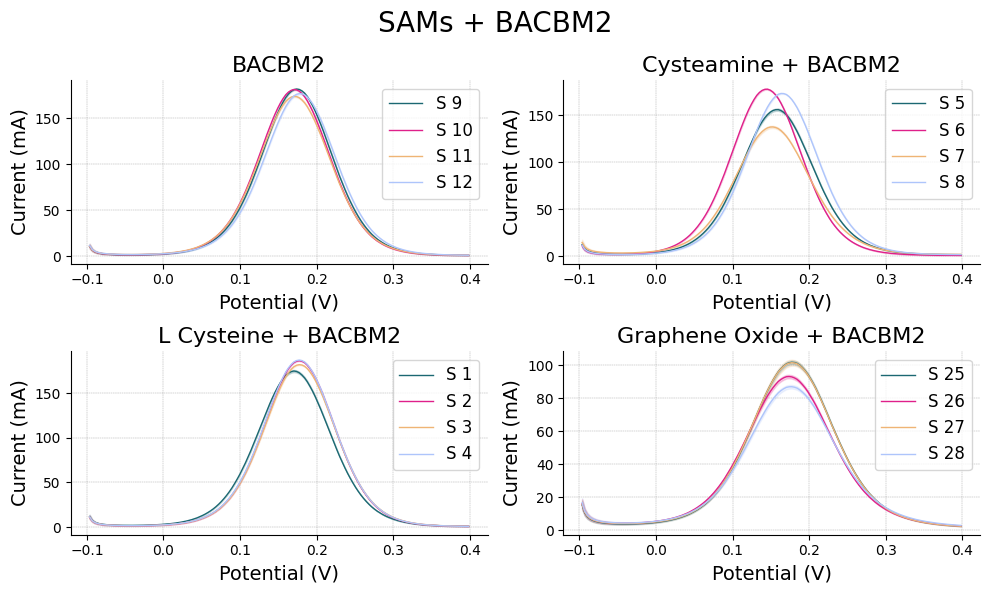

In [23]:
#fig, ax = plt.subplots(1, 1, figsize=(5, 3))
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 6))
ax1.set_title("BACBM2",fontsize = 16)
ax2.set_title("Cysteamine + BACBM2",fontsize = 16)
ax3.set_title("L Cysteine + BACBM2",fontsize = 16)
ax4.set_title("Graphene Oxide + BACBM2",fontsize = 16)


# CISTEAMINA:
c = 0
for u in range(5, 9):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-cisteaminaCBM-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-cisteaminaCBM-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-cisteaminaCBM-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax2.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax2.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)

    c+=1

# SÓ CBM:
c = 0

for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-CBM-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-CBM-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-CBM-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax1.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax1.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

# L cisteína:
c = 0
for u in range(1, 5):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-CBM-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-CBM-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-CBM-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax3.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax3.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

c = 0
for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-CBM-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-CBM-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-CBM-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax4.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u+16}')
    ax4.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1
    
    
    
for ax in [ax1,ax2,ax3, ax4]:
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
    ax.set_xlabel('Potential (V)', fontsize=14)
    ax.set_ylabel('Current (mA)', fontsize=14)
    ax.legend(fontsize=12)#, loc=1, bbox_to_anchor=(1.4, 1), framealpha=0.0)
    ax.spines[['right', 'top']].set_visible(False)
fig.suptitle("SAMs + BACBM2", fontsize = 20)

plt.tight_layout()
plt.savefig('figures/INCUBATION_SWV.png',dpi = 200)

# superblock

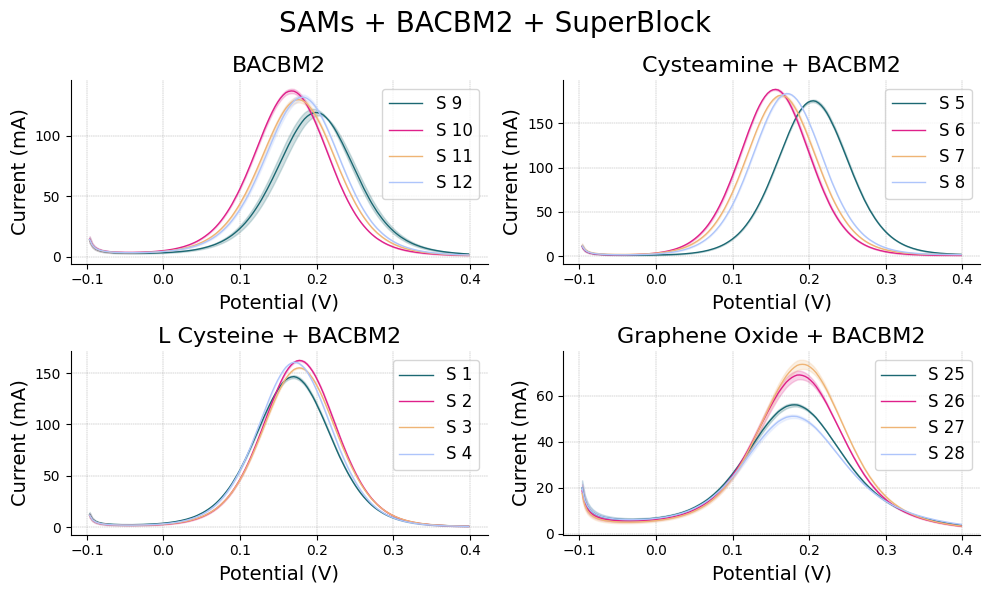

In [24]:
#fig, ax = plt.subplots(1, 1, figsize=(5, 3))
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 6))
ax1.set_title("BACBM2",fontsize = 16)
ax2.set_title("Cysteamine + BACBM2",fontsize = 16)
ax3.set_title("L Cysteine + BACBM2",fontsize = 16)
ax4.set_title("Graphene Oxide + BACBM2",fontsize = 16)


# CISTEAMINA:
c = 0
for u in range(5, 9):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-superblock-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-superblock-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-superblock-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax2.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax2.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)

    c+=1

# SÓ CBM:
c = 0

for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df[f'{u}-superblock-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df[f'{u}-superblock-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df[f'{u}-superblock-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax1.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax1.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

# L cisteína:
c = 0
for u in range(1, 5):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-branco-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-branco-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-branco-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax3.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u}')
    ax3.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1

c = 0
for u in range(9, 13):
    eletrodo = f'{u}-{ETAPAS[0]}'
    I1 = np.array(pd.to_numeric(files_df2[f'{u}-branco-SWV-5mM-FF.'][:-1], errors='coerce'))
    I2 = np.array(pd.to_numeric(files_df2[f'{u}-branco-SWV-5mM-FF-1.'][:-1], errors='coerce'))
    I3 = np.array(pd.to_numeric(files_df2[f'{u}-branco-SWV-5mM-FF-2.'][:-1], errors='coerce'))

    I_mean = (I1+I2+I3)/3
    stacked_I = np.stack((I1, I2, I3))
    I_std = np.std(stacked_I, axis=0)
    x = files_df['V'][:-1]  # Assuming 'V' is the voltage column
    # Plot for the main axis (ax)
    ax4.plot(x, I_mean, color=PALETTE[c], linewidth=1, label=f'S {u+16}')
    ax4.fill_between(x, I_mean - I_std, I_mean + I_std, color=PALETTE[c], alpha=0.2)
    # 1lassic styling: grid and labels without background color

    c+=1
    
    
    
for ax in [ax1,ax2,ax3, ax4]:
    ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
    ax.set_xlabel('Potential (V)', fontsize=14)
    ax.set_ylabel('Current (mA)', fontsize=14)
    ax.legend(fontsize=12)#, loc=1, bbox_to_anchor=(1.4, 1), framealpha=0.0)
    ax.spines[['right', 'top']].set_visible(False)
fig.suptitle("SAMs + BACBM2 + SuperBlock", fontsize = 20)

plt.tight_layout()
plt.savefig('figures/SUPERBLOCK_SWV.png',dpi = 200)